In [489]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [490]:
ca_df = pd.read_csv('train_data/weather_ca.csv')
br_df = pd.read_csv('train_data/weather_br.csv')
fl_df = pd.read_csv('train_data/weather_fl.csv')

In [491]:
ca_df = ca_df.drop(columns=['CA - ETo (in)', 'CA - Max Rel Hum (%)','CA - Min Rel Hum (%)', 'CA - Dew Point (F)','CA - Wind Run (miles)','CA - Avg Soil Temp (F)'])
scaler = MinMaxScaler()
ca_df[['CA - Sol Rad (Ly/day)', 'CA - Avg Vap Pres (mBars)']] = scaler.fit_transform(ca_df[['CA - Sol Rad (Ly/day)', 'CA - Avg Vap Pres (mBars)']])
pd.to_datetime(ca_df['Date'])

ca_df

,Date,CA - Precip (in),CA - Sol Rad (Ly/day),CA - Avg Vap Pres (mBars),CA - Max Air Temp (F),CA - Min Air Temp (F),CA - Avg Air Temp (F),CA - Avg Rel Hum (%),CA - Avg Wind Speed (mph)
0,2010-01-01,0.00250,0.140932,0.314741,57.5375,37.625000,45.4625,91.250,2.6625
1,2010-01-02,0.00625,0.115603,0.268260,51.0000,37.371429,40.7875,89.875,3.0250
2,2010-01-03,0.00125,0.119662,0.307437,52.7000,39.971429,43.5375,91.500,3.4750
3,2010-01-04,0.00375,0.064621,0.259628,46.2625,37.385714,41.0750,92.750,2.7750
4,2010-01-05,0.00000,0.072414,0.254316,46.2875,36.337500,41.4000,92.750,2.9875
...,...,...,...,...,...,...,...,...,...
5474,2024-12-27,0.14750,0.186232,0.492032,64.9625,46.300000,53.5875,91.000,4.8500
5475,2024-12-28,0.00375,0.222763,0.488048,65.3625,43.737500,53.0375,92.375,2.6125
5476,2024-12-29,0.02000,0.149050,0.492696,63.6500,43.412500,53.1625,92.875,4.5875
5477,2024-12-30,0.00125,0.220815,0.344622,56.7375,40.437500,48.1875,87.250,5.4625


In [492]:
ca_df['Date'] = pd.to_datetime(ca_df['Date'])
monthly_stats = ca_df.groupby(pd.Grouper(key='Date', freq='M')).agg(['mean', 'std'])
monthly_stats.columns = ['_'.join(col) for col in monthly_stats.columns]
monthly_stats = monthly_stats.reset_index()

monthly_stats.describe().T


,count,mean,min,25%,50%,75%,max,std
Date,180,2017-07-15 18:16:00,2010-01-31 00:00:00,2013-10-23 06:00:00,2017-07-15 12:00:00,2021-04-07 12:00:00,2024-12-31 00:00:00,NaN
CA - Precip (in)_mean,180.0,0.02335,0.0,0.000708,0.0087,0.036991,0.148594,0.030675
CA - Precip (in)_std,180.0,0.054261,0.0,0.00292,0.029659,0.091869,0.272049,0.061483
CA - Sol Rad (Ly/day)_mean,180.0,0.549107,0.144949,0.321848,0.55109,0.765335,0.923213,0.236757
CA - Sol Rad (Ly/day)_std,180.0,0.085785,0.025818,0.060379,0.081989,0.10599,0.190259,0.033914
CA - Avg Vap Pres (mBars)_mean,180.0,0.412268,0.121064,0.31662,0.394332,0.521172,0.717474,0.131684
CA - Avg Vap Pres (mBars)_std,180.0,0.098939,0.046147,0.078275,0.096122,0.115203,0.215406,0.029331
CA - Max Air Temp (F)_mean,180.0,77.332711,52.289747,65.303375,77.35541,91.108408,101.477247,13.74571
CA - Max Air Temp (F)_std,180.0,6.027575,2.331955,4.788587,5.934838,7.246508,10.179764,1.699353
CA - Min Air Temp (F)_mean,180.0,48.480871,28.07379,39.72365,47.52186,57.719241,66.018721,9.786771


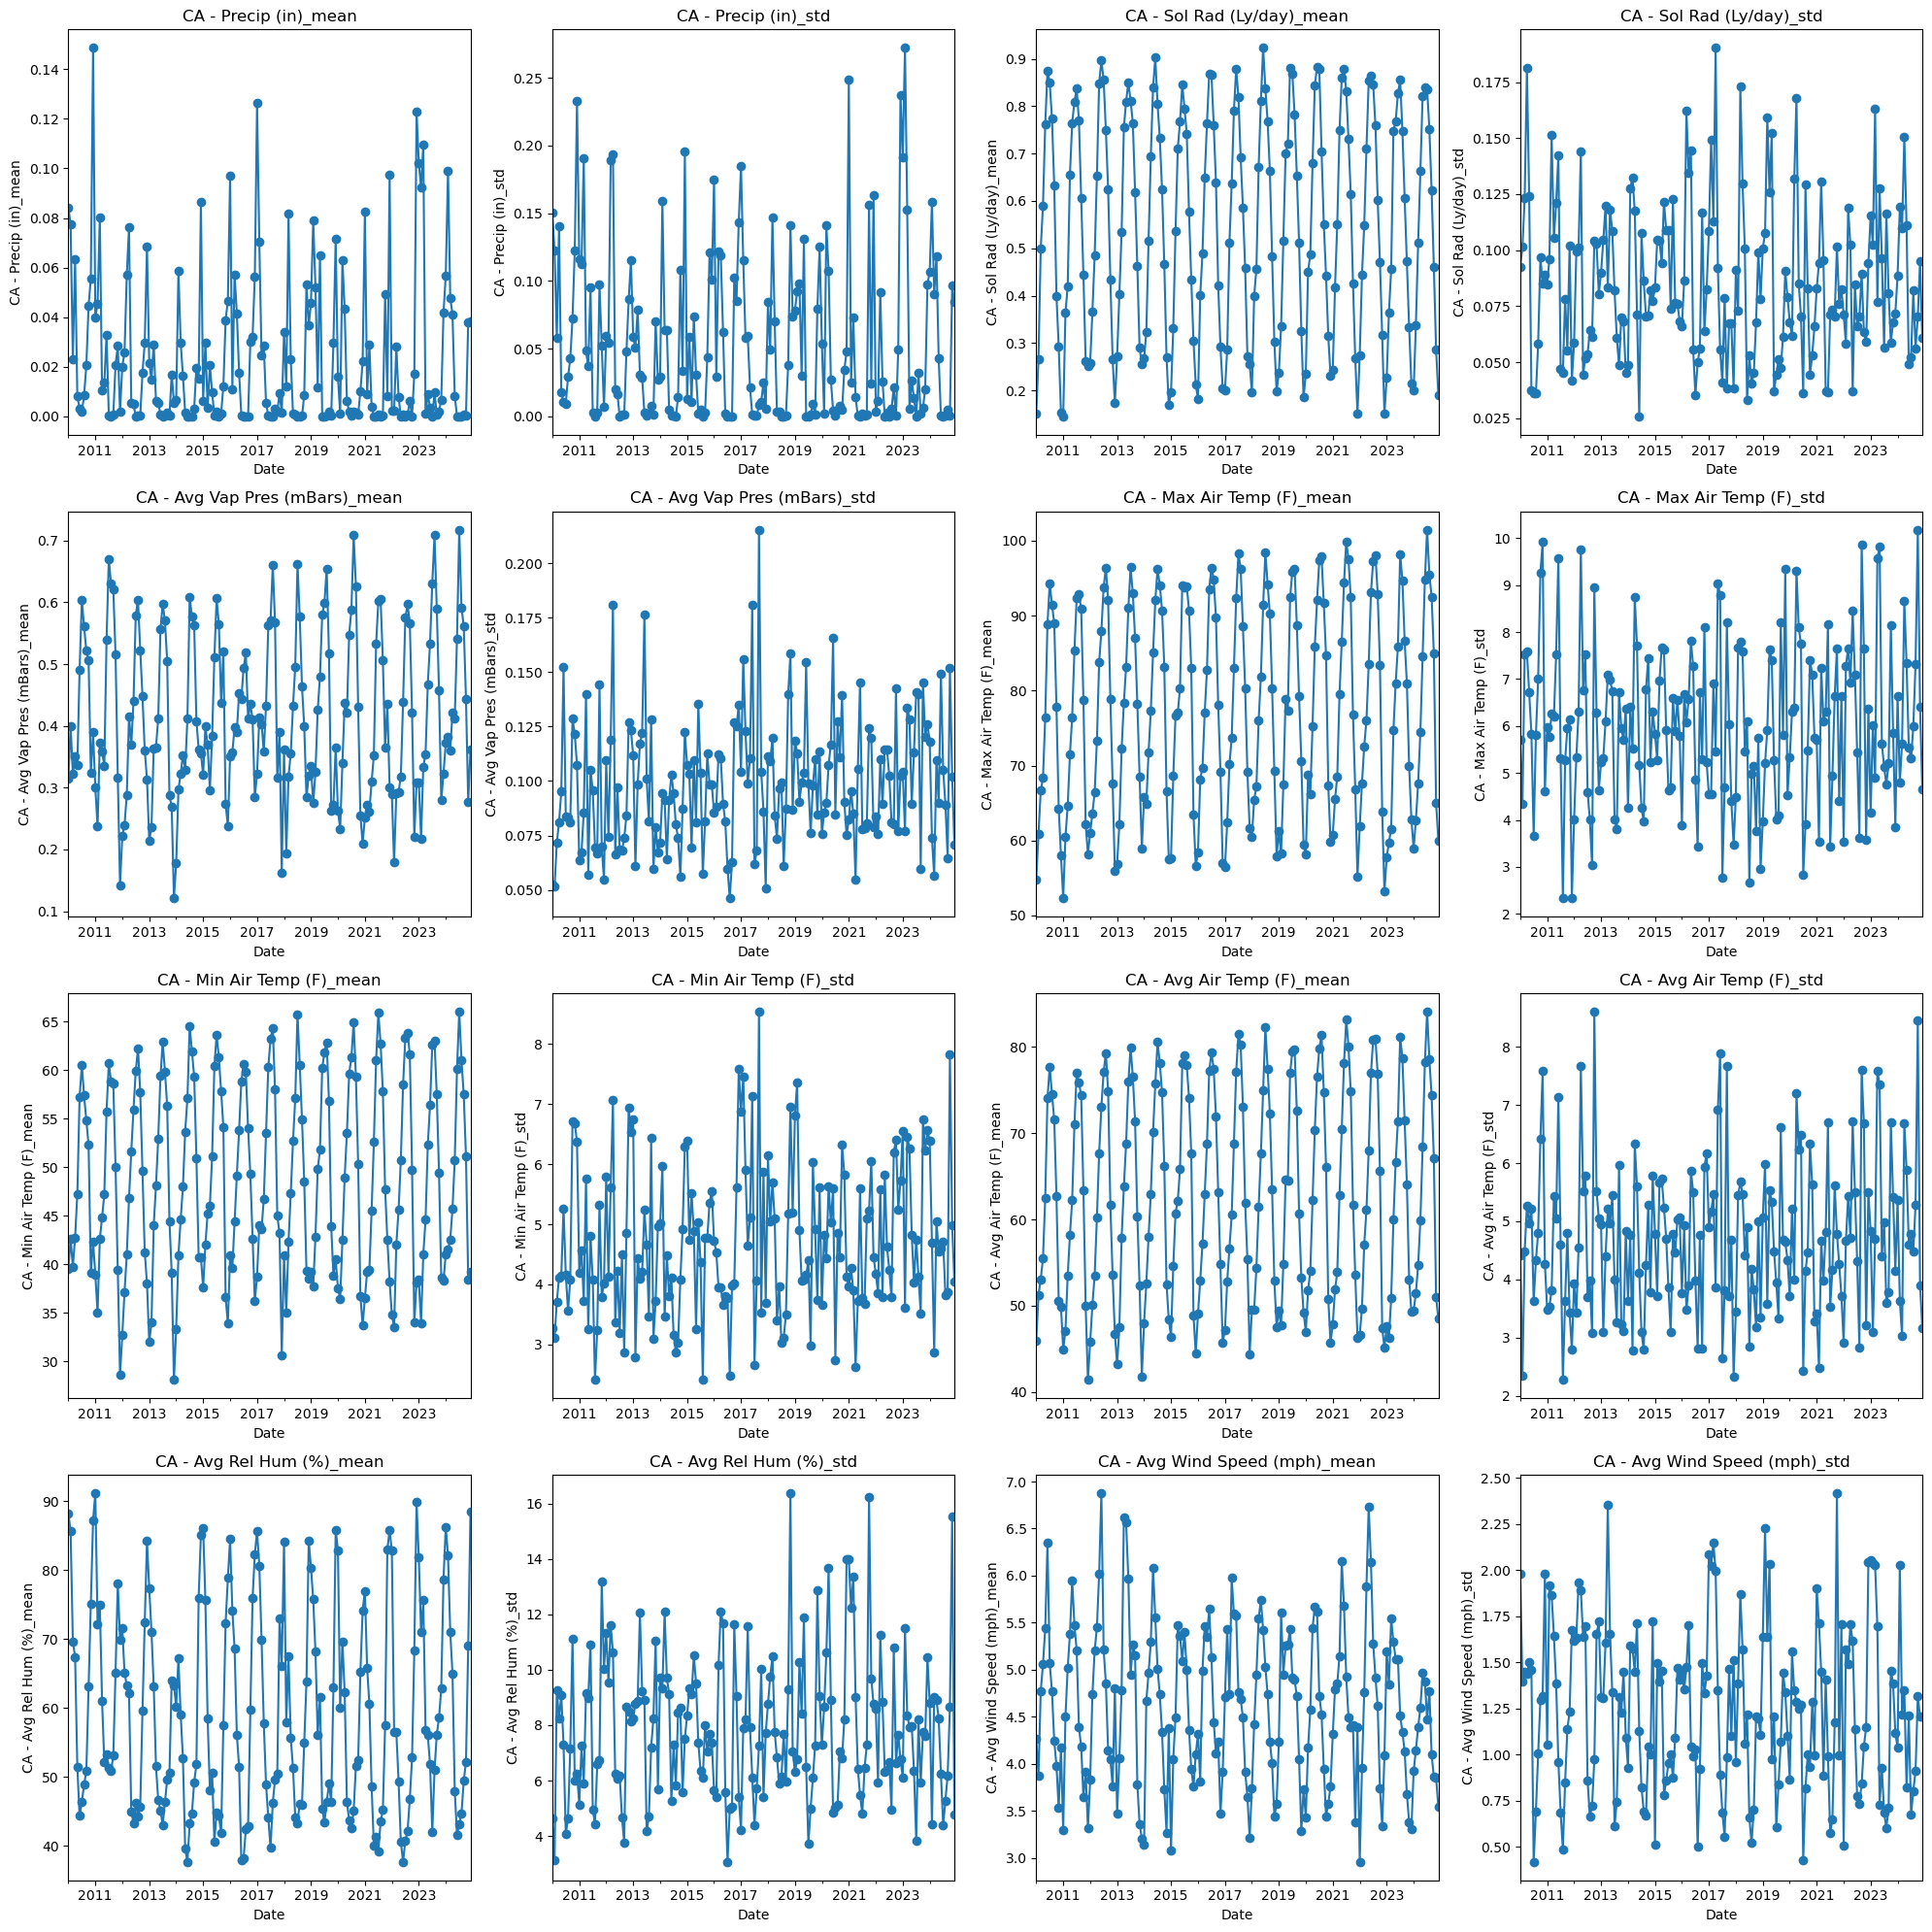

In [493]:
import matplotlib.pyplot as plt

monthly_stats['Date'] = pd.to_datetime(monthly_stats['Date'])
monthly_stats.set_index('Date', inplace=True)
num_cols = len(monthly_stats.columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Loop through each column and plot its data
for i, col in enumerate(monthly_stats.columns):
    monthly_stats[col].plot(ax=axes[i], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(col)

# If there are extra subplots, hide them
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [494]:
import re

def rename_column(col):
    # This regex captures the variable, the unit, and the stat (mean or std)
    pattern = r"CA - (.+) \((.+)\)_(mean|std)"
    match = re.match(pattern, col)
    if match:
        variable = match.group(1)
        unit = match.group(2)
        stat = match.group(3).capitalize()  # Capitalize 'mean' or 'std'
        return f"{variable} {stat} ({unit})"
    # If the column doesn't match the expected pattern, return it unchanged.
    return col

# Assuming your DataFrame is named 'df' (or 'monthly_stats' etc.)
monthly_stats.columns = [rename_column(col) for col in monthly_stats.columns]
monthly_stats

,Precip Mean (in),Precip Std (in),Sol Rad Mean (Ly/day),Sol Rad Std (Ly/day),Avg Vap Pres Mean (mBars),Avg Vap Pres Std (mBars),Max Air Temp Mean (F),Max Air Temp Std (F),Min Air Temp Mean (F),Min Air Temp Std (F),Avg Air Temp Mean (F),Avg Air Temp Std (F),Avg Rel Hum Mean (%),Avg Rel Hum Std (%),Avg Wind Speed Mean (mph),Avg Wind Speed Std (mph)
Date,,,,,,,,,,,,,,,,
2010-01-31,0.084113,0.150124,0.151025,0.092443,0.315062,0.052643,54.779724,5.714668,39.490092,3.269914,45.937615,4.423281,88.161866,4.629392,4.263306,1.979104
2010-02-28,0.077500,0.122593,0.266584,0.101418,0.399829,0.051508,60.862946,4.334016,42.625893,3.115623,51.224554,2.352450,85.723214,3.120897,3.875000,1.395338
2010-03-31,0.023162,0.058168,0.499310,0.123196,0.321871,0.071581,66.651152,7.516172,39.754666,3.709048,53.088767,4.489845,69.672811,9.265417,4.770449,1.449245
2010-04-30,0.063458,0.140083,0.590567,0.181362,0.351417,0.081193,68.337083,7.577927,42.756667,4.113720,55.486250,5.266357,67.433333,8.244299,5.058750,1.436175
2010-05-31,0.008105,0.017601,0.761757,0.124038,0.336467,0.095164,76.387500,6.710604,47.235138,4.148557,62.450230,4.967507,51.389401,9.074577,5.438825,1.500282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.000161,0.000703,0.751510,0.081965,0.591591,0.089205,95.489516,5.985690,61.011290,3.822911,78.548790,4.482580,44.689516,5.276310,4.771774,0.801899
2024-09-30,0.000875,0.004793,0.621887,0.056137,0.561310,0.064437,92.546250,7.324374,57.465417,3.873058,74.345833,5.281897,49.420833,6.188707,4.095833,0.913650
2024-10-31,0.000242,0.000991,0.460674,0.070248,0.443838,0.151947,84.935081,10.179764,51.098790,7.837118,67.085887,8.461423,52.202765,8.681516,3.862097,1.315103


In [495]:
# Read the CSV file
date_df = pd.read_csv('train_data/domestic_production.csv')

# Adjust the Year for months after July: subtract 1 from Year if Month > 7
date_df.loc[date_df['Month'] > 7, 'Year'] = date_df.loc[date_df['Month'] > 7, 'Year'] - 1

# Create a datetime object from the two-digit Year and Month columns.
# We set the day to '01', then add a MonthEnd offset to get the last day of the month.
date_df['Date'] = pd.to_datetime(
    date_df['Year'].astype(str).str.zfill(2) +
    date_df['Month'].astype(str).str.zfill(2) +
    '01',
    format='%y%m%d'
) + pd.offsets.MonthEnd(1)

# Drop the now redundant Month and Year columns
date_df = date_df.drop(columns=['Month', 'Year'])

# Sort the DataFrame by Date
date_df = date_df.sort_values(by='Date').reset_index(drop=True)

# Save the resulting DataFrame to a CSV file
date_df.describe().T


,count,mean,min,25%,50%,75%,max,std
Florida_Forecast,145.0,81388.413793,15650.0,47000.0,72400.0,125000.0,154000.0,41843.001932
California_Forecast,145.0,51696.551724,43500.0,47600.0,50500.0,55000.0,61000.0,5231.387826
Date,145,2017-05-29 13:44:16.551724032,2009-12-31 00:00:00,2013-11-30 00:00:00,2017-05-31 00:00:00,2021-01-31 00:00:00,2024-07-31 00:00:00,NaN


In [496]:
date_df = date_df.sort_values(by='Date').reset_index(drop=True)
date_df['Previous Month (CA)'] = date_df['California_Forecast']
date_df['Previous Month (CA)'] = date_df['Previous Month (CA)'].shift(1)

date_df['Previous Month (FL)'] = date_df['Florida_Forecast']
date_df['Previous Month (FL)'] = date_df['Previous Month (FL)'].shift(1)

date_df

,Florida_Forecast,California_Forecast,Date,Previous Month (CA),Previous Month (FL)
0,135000,55000,2009-12-31,NaN,NaN
1,135000,55000,2010-01-31,55000.0,135000.0
2,129000,55000,2010-02-28,55000.0,135000.0
3,131000,55000,2010-03-31,55000.0,129000.0
4,131600,59000,2010-04-30,55000.0,131000.0
...,...,...,...,...,...
140,19800,46000,2024-03-31,45800.0,19800.0
141,18800,46000,2024-04-30,46000.0,19800.0
142,17800,46000,2024-05-31,46000.0,18800.0
143,17860,46000,2024-06-30,46000.0,17800.0


In [497]:
monthly_stats['Location'] = 'CA'
merged_df = pd.merge(monthly_stats, date_df[['Date', 'California_Forecast', 'Previous Month (CA)']], on='Date', how='left')
merged_df.rename(columns={'California_Forecast': 'Production', 'Previous Month (CA)': 'Previous Month'}, inplace=True)
# merged_df.to_csv('ca_data.csv', index=False)
merged_df.dropna(inplace=True)
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,144,2017-06-17 08:50:00,2010-01-31 00:00:00,2013-12-23 06:00:00,2017-06-15 00:00:00,2021-02-07 00:00:00,2024-07-31 00:00:00,NaN
Precip Mean (in),144.0,0.027619,0.0,0.001956,0.015183,0.043617,0.148594,0.032305
Precip Std (in),144.0,0.063898,0.0,0.006333,0.048244,0.103311,0.272049,0.063667
Sol Rad Mean (Ly/day),144.0,0.530765,0.144949,0.29134,0.48577,0.805683,0.923213,0.250042
Sol Rad Std (Ly/day),144.0,0.089532,0.025818,0.063864,0.085803,0.1092,0.190259,0.03523
Avg Vap Pres Mean (mBars),144.0,0.382585,0.121064,0.300805,0.363102,0.438646,0.717474,0.119297
Avg Vap Pres Std (mBars),144.0,0.101827,0.05072,0.083736,0.100112,0.118046,0.181056,0.027781
Max Air Temp Mean (F),144.0,74.473771,52.289747,63.3275,72.968952,83.589387,101.477247,13.053825
Max Air Temp Std (F),144.0,6.10039,2.331955,5.163324,5.995685,7.35457,9.809225,1.643221
Min Air Temp Mean (F),144.0,46.44917,28.07379,39.251302,44.60953,52.746731,66.018721,9.257237


In [498]:
fl_df = fl_df.drop(columns=['FL - Precip Cover (%)'])
scaler = MinMaxScaler()
fl_df[['FL - Sea Level Pressure','FL - UV Index']] = scaler.fit_transform(fl_df[['FL - Sea Level Pressure','FL - UV Index']])
pd.to_datetime(fl_df['Date'])

fl_df

,Date,FL - Max Air Temp (F),FL - Min Air Temp (F),FL - Avg Air Temp (F),FL - Avg Humidity (%),FL - Precip (in),FL - Wind Speed (mph),FL - Sea Level Pressure,FL - UV Index
0,2010-01-01,68.600000,49.333333,60.466667,89.666667,0.226000,15.600000,0.548974,0.333333
1,2010-01-02,59.233333,38.666667,48.033333,70.300000,0.007667,15.433333,0.663713,0.700000
2,2010-01-03,47.566667,36.766667,42.300000,66.500000,0.000000,10.633333,0.655317,0.300000
3,2010-01-04,53.866667,32.166667,41.966667,56.666667,0.000000,12.566667,0.644123,0.700000
4,2010-01-05,50.400000,31.966667,40.733333,56.866667,0.000333,15.766667,0.705690,0.666667
...,...,...,...,...,...,...,...,...,...
5474,2024-12-27,79.433333,63.500000,69.866667,87.733333,0.000333,8.433333,0.601679,0.533333
5475,2024-12-28,76.966667,65.633333,70.866667,90.733333,0.061333,12.033333,0.604478,0.333333
5476,2024-12-29,77.533333,67.900000,71.700000,87.633333,0.451333,14.833333,0.518657,0.500000
5477,2024-12-30,79.333333,65.866667,71.433333,88.766667,0.002667,6.900000,0.479478,0.533333


In [499]:
fl_df['Date'] = pd.to_datetime(fl_df['Date'])
fl_stats = fl_df.groupby(pd.Grouper(key='Date', freq='M')).agg(['mean', 'std'])
fl_stats.columns = ['_'.join(col) for col in fl_stats.columns]
fl_stats = fl_stats.reset_index()

fl_stats.describe().T



,count,mean,min,25%,50%,75%,max,std
Date,180,2017-07-15 18:16:00,2010-01-31 00:00:00,2013-10-23 06:00:00,2017-07-15 12:00:00,2021-04-07 12:00:00,2024-12-31 00:00:00,NaN
FL - Max Air Temp (F)_mean,180.0,83.64437,66.06129,78.456129,84.75,89.680108,93.772043,6.811624
FL - Max Air Temp (F)_std,180.0,4.125911,1.476191,2.650306,3.639086,5.519539,10.679296,1.869607
FL - Min Air Temp (F)_mean,180.0,64.946784,41.190323,58.082262,65.975627,73.449444,77.226882,8.610297
FL - Min Air Temp (F)_std,180.0,4.657875,0.825071,1.982918,4.859629,6.845577,11.785978,2.653614
FL - Avg Air Temp (F)_mean,180.0,73.378176,52.927957,67.524561,74.595412,80.223118,83.933333,7.364127
FL - Avg Air Temp (F)_std,180.0,3.897572,0.969934,2.000683,3.330194,5.417641,11.307683,2.076203
FL - Avg Humidity (%)_mean,180.0,75.476368,60.76129,73.010589,76.407527,78.472043,86.110753,4.659122
FL - Avg Humidity (%)_std,180.0,6.715318,2.863363,4.817676,6.507253,8.33131,13.266716,2.155996
FL - Precip (in)_mean,180.0,0.104483,0.000978,0.031747,0.07984,0.168312,0.378533,0.085938


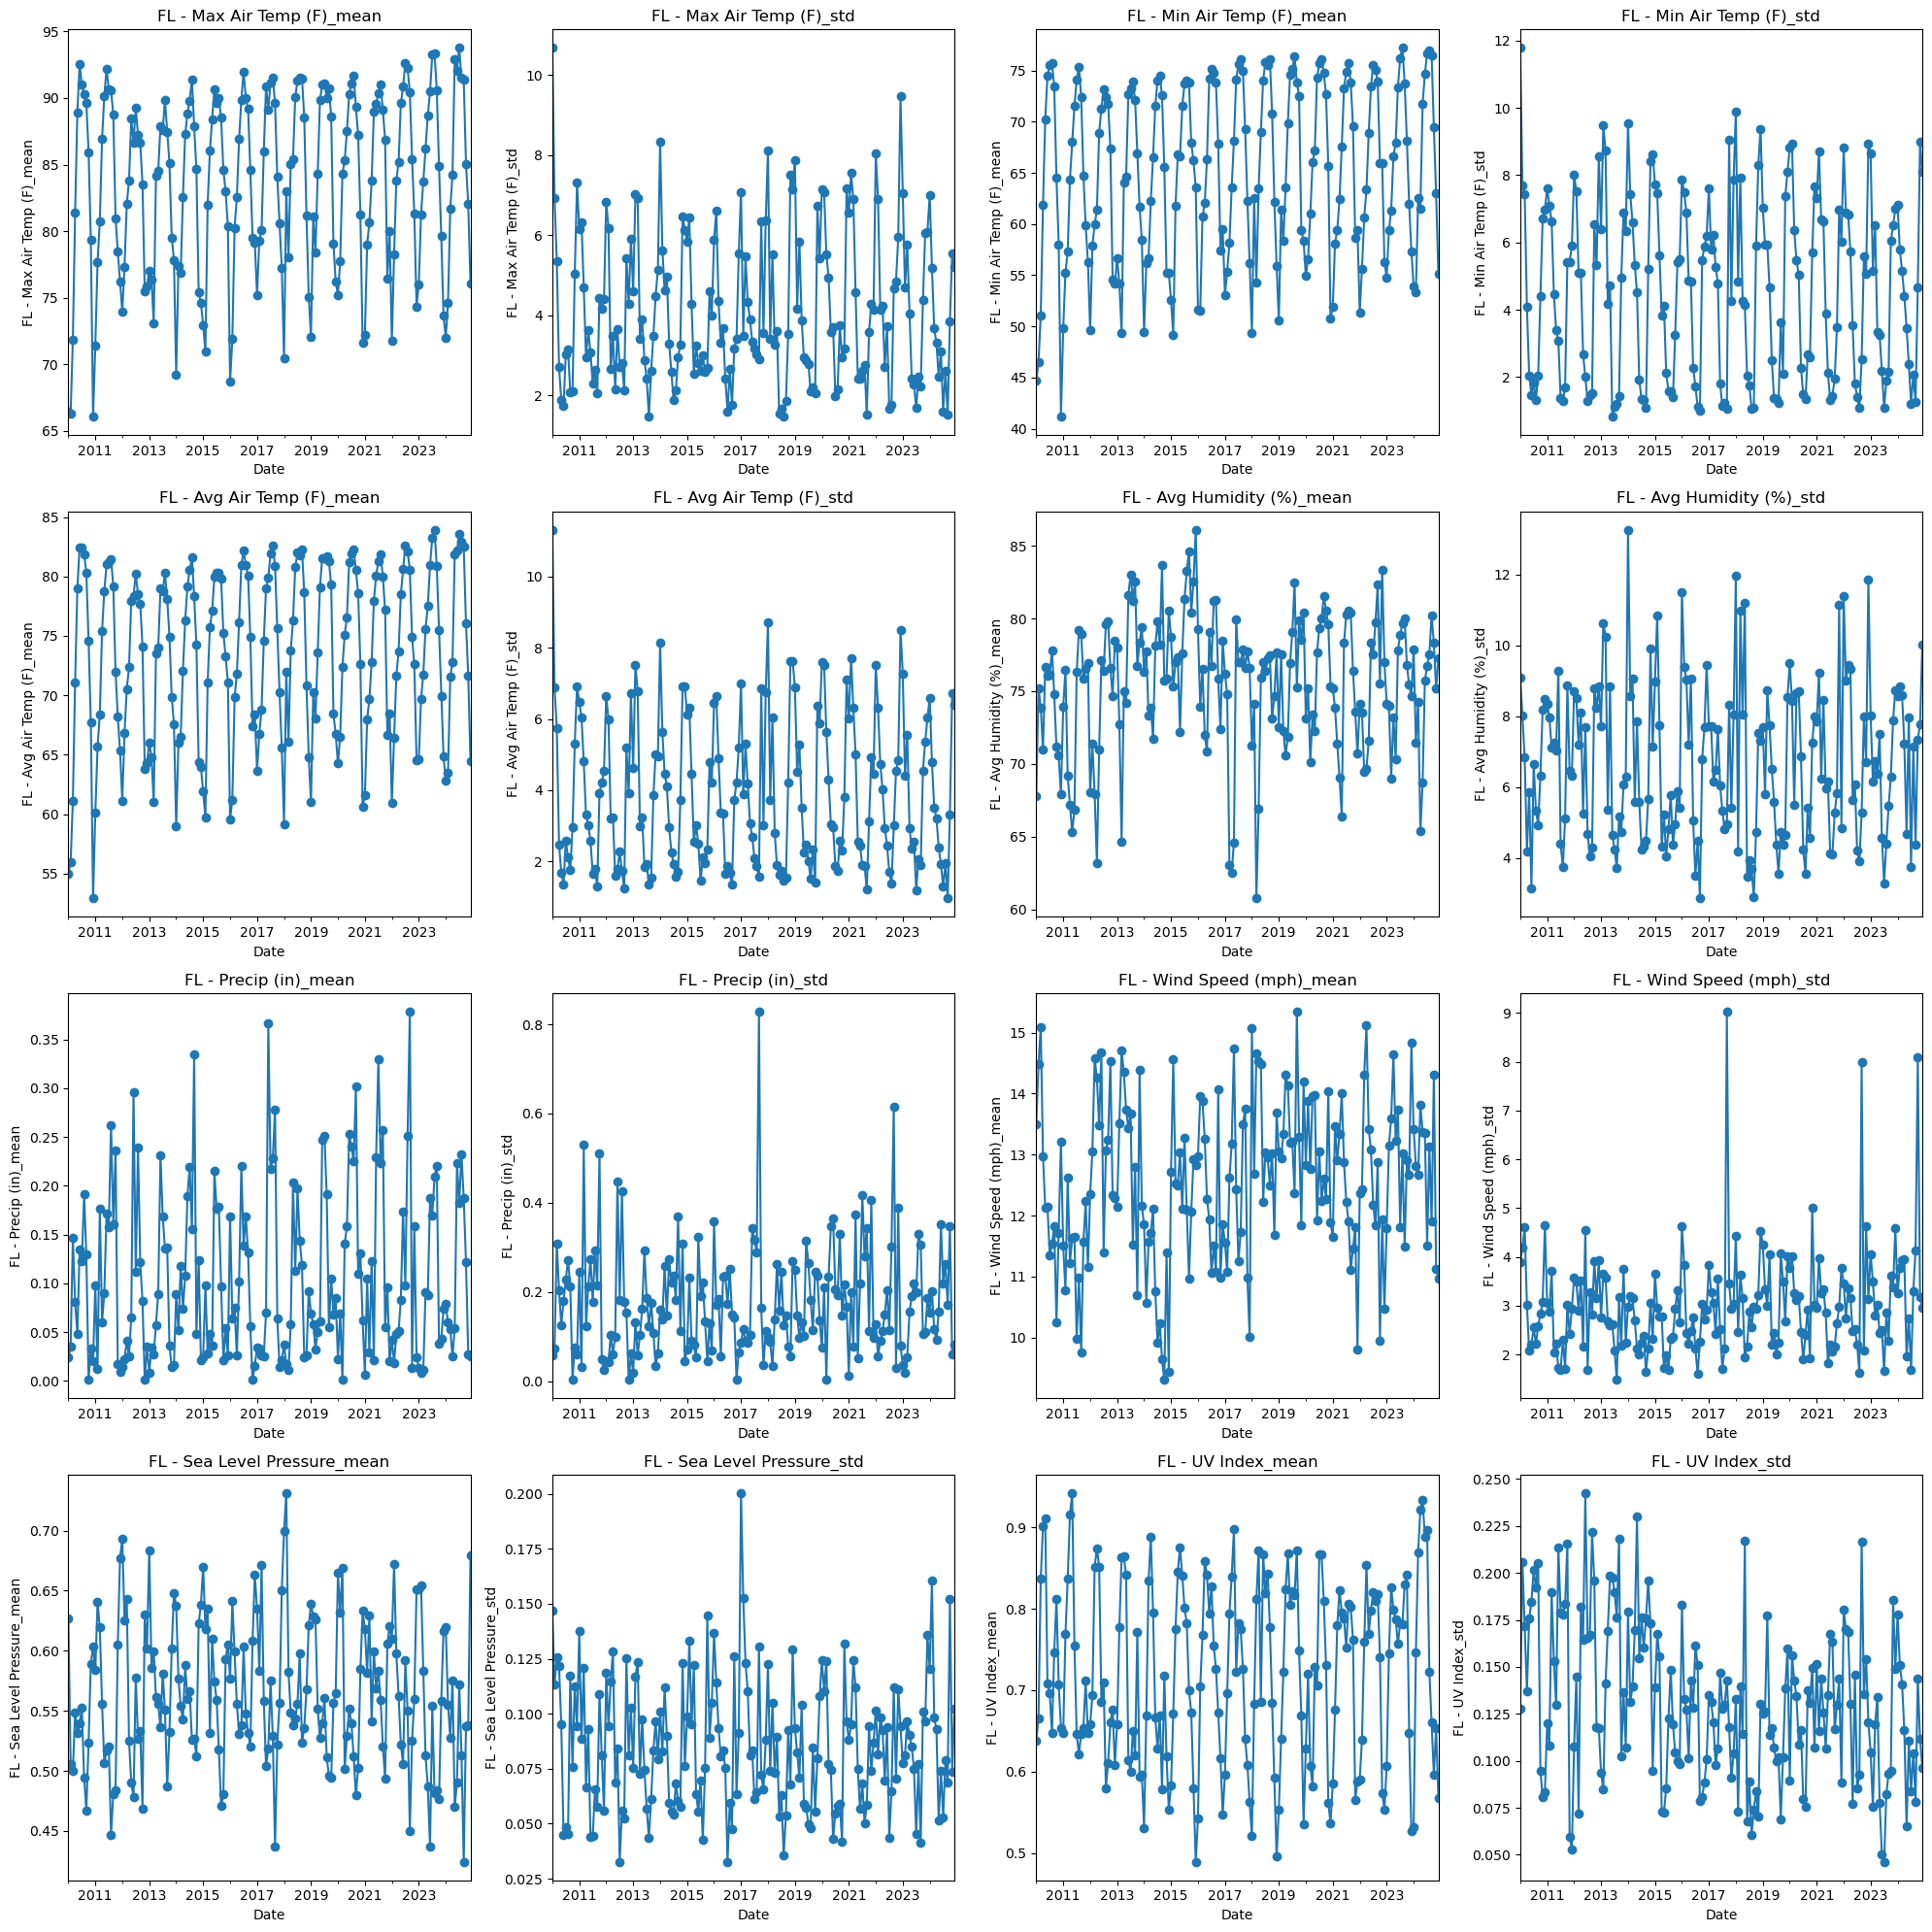

In [500]:
import matplotlib.pyplot as plt

fl_stats['Date'] = pd.to_datetime(fl_stats['Date'])
fl_stats.set_index('Date', inplace=True)
num_cols = len(fl_stats.columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Loop through each column and plot its data
for i, col in enumerate(fl_stats.columns):
    fl_stats[col].plot(ax=axes[i], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(col)

# If there are extra subplots, hide them
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



In [501]:
def rename_column(col):
    # This pattern makes the unit (and its surrounding parentheses) optional.
    pattern = r"FL - (.+?)(?: \((.+?)\))?_(mean|std)"
    match = re.match(pattern, col)
    if match:
        variable = match.group(1)
        unit = match.group(2)  # May be None if not present
        stat = match.group(3).capitalize()  # 'Mean' or 'Std'
        # Reassemble the name. Include the unit if it's present.
        return f"{variable} {stat}" + (f" ({unit})" if unit else "")
    return col

# Assuming your DataFrame is named 'fl_stats'
fl_stats.columns = [rename_column(col) for col in fl_stats.columns]
fl_stats


,Max Air Temp Mean (F),Max Air Temp Std (F),Min Air Temp Mean (F),Min Air Temp Std (F),Avg Air Temp Mean (F),Avg Air Temp Std (F),Avg Humidity Mean (%),Avg Humidity Std (%),Precip Mean (in),Precip Std (in),Wind Speed Mean (mph),Wind Speed Std (mph),Sea Level Pressure Mean,Sea Level Pressure Std,UV Index Mean,UV Index Std
Date,,,,,,,,,,,,,,,,
2010-01-31,66.401075,10.679296,44.655914,11.785978,54.975269,11.307683,67.792473,9.094401,0.023871,0.057005,13.495699,3.893544,0.626790,0.147020,0.637634,0.127582
2010-02-28,66.266667,6.925494,46.491667,7.702063,55.947619,6.874587,75.227381,8.013579,0.034976,0.074091,14.478571,4.197228,0.505997,0.113355,0.665476,0.205777
2010-03-31,71.824731,5.350521,51.084946,7.443276,61.120430,5.746256,73.883871,6.832167,0.146613,0.307942,15.083871,4.610036,0.499819,0.125515,0.836559,0.171563
2010-04-30,81.373333,2.723101,61.836667,4.080496,71.094444,2.482924,71.010000,4.196305,0.081067,0.204501,12.975556,3.013354,0.548647,0.121714,0.901111,0.137153
2010-05-31,88.907527,1.879257,70.201075,2.047482,78.969892,1.685655,76.634409,5.861516,0.048312,0.125461,12.130108,2.075650,0.531416,0.095042,0.910753,0.175623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,91.508602,2.610817,77.002151,2.059233,82.878495,1.955591,77.533333,7.154579,0.232398,0.263624,13.134409,3.296760,0.513300,0.078872,0.722581,0.104132
2024-09-30,91.391111,1.523103,76.523333,1.246456,82.472222,0.969934,80.237778,4.387816,0.187000,0.172056,11.900000,4.142583,0.424285,0.068954,0.661111,0.078337
2024-10-31,85.068817,3.863303,69.443011,4.676016,76.072043,3.325191,78.304301,7.347808,0.122172,0.347216,14.313978,8.080996,0.536892,0.152049,0.596774,0.143850


In [502]:
fl_stats['Location'] = 'FL'
fl_merged = pd.merge(fl_stats, date_df[['Date', 'Florida_Forecast', 'Previous Month (FL)']], on='Date', how='left')
fl_merged.rename(columns={'Florida_Forecast': 'Production', 'Previous Month (FL)': 'Previous Month'}, inplace=True)
fl_merged.dropna(inplace=True)
fl_merged.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,144,2017-06-17 08:50:00,2010-01-31 00:00:00,2013-12-23 06:00:00,2017-06-15 00:00:00,2021-02-07 00:00:00,2024-07-31 00:00:00,NaN
Max Air Temp Mean (F),144.0,82.408276,66.06129,77.30762,83.255818,88.56129,93.772043,6.820648
Max Air Temp Std (F),144.0,4.459934,1.54106,2.962306,4.148566,5.925327,10.679296,1.879655
Min Air Temp Mean (F),144.0,63.057317,41.190323,56.535771,62.537346,69.625806,76.643011,8.237158
Min Air Temp Std (F),144.0,5.225787,0.825071,3.262408,5.447554,7.048673,11.785978,2.483356
Avg Air Temp Mean (F),144.0,71.935224,52.927957,66.353293,72.378907,78.621505,83.550538,7.244041
Avg Air Temp Std (F),144.0,4.301803,1.196524,2.54685,4.152492,6.021011,11.307683,2.025612
Avg Humidity Mean (%),144.0,74.553255,60.76129,71.84086,75.393602,77.617473,86.110753,4.569893
Avg Humidity Std (%),144.0,7.138836,3.134083,5.563886,7.242257,8.582057,13.266716,2.086641
Precip Mean (in),144.0,0.087521,0.000978,0.025901,0.061285,0.123492,0.366778,0.076481


In [503]:
merged_df.keys()

Index(['Date', 'Precip Mean (in)', 'Precip Std (in)', 'Sol Rad Mean (Ly/day)',
       'Sol Rad Std (Ly/day)', 'Avg Vap Pres Mean (mBars)',
       'Avg Vap Pres Std (mBars)', 'Max Air Temp Mean (F)',
       'Max Air Temp Std (F)', 'Min Air Temp Mean (F)', 'Min Air Temp Std (F)',
       'Avg Air Temp Mean (F)', 'Avg Air Temp Std (F)', 'Avg Rel Hum Mean (%)',
       'Avg Rel Hum Std (%)', 'Avg Wind Speed Mean (mph)',
       'Avg Wind Speed Std (mph)', 'Location', 'Production', 'Previous Month'],
      dtype='object')

In [504]:
fl_merged.keys()

Index(['Date', 'Max Air Temp Mean (F)', 'Max Air Temp Std (F)',
       'Min Air Temp Mean (F)', 'Min Air Temp Std (F)',
       'Avg Air Temp Mean (F)', 'Avg Air Temp Std (F)',
       'Avg Humidity Mean (%)', 'Avg Humidity Std (%)', 'Precip Mean (in)',
       'Precip Std (in)', 'Wind Speed Mean (mph)', 'Wind Speed Std (mph)',
       'Sea Level Pressure Mean', 'Sea Level Pressure Std', 'UV Index Mean',
       'UV Index Std', 'Location', 'Production', 'Previous Month'],
      dtype='object')

In [505]:
rename_dict = {
    'Sol Rad Mean (Ly/day)': 'UV Index Mean',
    'Sol Rad Std (Ly/day)': 'UV Index Std',
    'Avg Vap Pres Mean (mBars)': 'Sea Level Pressure Mean',
    'Avg Vap Pres Std (mBars)': 'Sea Level Pressure Std',
    'Avg Rel Hum Mean (%)': 'Avg Humidity Mean (%)',
    'Avg Rel Hum Std (%)': 'Avg Humidity Std (%)',
    'Avg Wind Speed Mean (mph)': 'Wind Speed Mean (mph)',
    'Avg Wind Speed Std (mph)': 'Wind Speed Std (mph)'
}

merged_df = merged_df.rename(columns=rename_dict)
merged_df


,Date,Precip Mean (in),Precip Std (in),UV Index Mean,UV Index Std,Sea Level Pressure Mean,Sea Level Pressure Std,Max Air Temp Mean (F),Max Air Temp Std (F),Min Air Temp Mean (F),Min Air Temp Std (F),Avg Air Temp Mean (F),Avg Air Temp Std (F),Avg Humidity Mean (%),Avg Humidity Std (%),Wind Speed Mean (mph),Wind Speed Std (mph),Location,Production,Previous Month
0,2010-01-31,0.084113,0.150124,0.151025,0.092443,0.315062,0.052643,54.779724,5.714668,39.490092,3.269914,45.937615,4.423281,88.161866,4.629392,4.263306,1.979104,CA,55000.0,55000.0
1,2010-02-28,0.077500,0.122593,0.266584,0.101418,0.399829,0.051508,60.862946,4.334016,42.625893,3.115623,51.224554,2.352450,85.723214,3.120897,3.875000,1.395338,CA,55000.0,55000.0
2,2010-03-31,0.023162,0.058168,0.499310,0.123196,0.321871,0.071581,66.651152,7.516172,39.754666,3.709048,53.088767,4.489845,69.672811,9.265417,4.770449,1.449245,CA,55000.0,55000.0
3,2010-04-30,0.063458,0.140083,0.590567,0.181362,0.351417,0.081193,68.337083,7.577927,42.756667,4.113720,55.486250,5.266357,67.433333,8.244299,5.058750,1.436175,CA,59000.0,55000.0
4,2010-05-31,0.008105,0.017601,0.761757,0.124038,0.336467,0.095164,76.387500,6.710604,47.235138,4.148557,62.450230,4.967507,51.389401,9.074577,5.438825,1.500282,CA,59000.0,59000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2024-03-31,0.047742,0.090230,0.510928,0.109852,0.360943,0.056412,67.624194,5.628922,42.513306,2.863342,54.666532,3.028619,71.084677,9.009913,4.387903,1.215107,CA,46000.0,45800.0
171,2024-04-30,0.041208,0.118071,0.662829,0.150433,0.421780,0.109699,74.509167,8.655208,45.734583,5.055840,59.925833,6.688351,64.975000,8.911466,4.597500,1.350265,CA,46000.0,46000.0
172,2024-05-31,0.008185,0.043313,0.822175,0.110958,0.411837,0.090026,84.620565,7.341956,50.728226,4.549096,68.416935,5.891539,48.004032,8.247000,4.964516,0.823971,CA,46000.0,46000.0
173,2024-06-30,0.000125,0.000685,0.839325,0.049148,0.541589,0.149220,94.801250,5.545796,60.057500,4.592891,78.178333,4.606515,41.644048,6.253678,4.877500,1.211584,CA,46000.0,46000.0


In [506]:
combined_df = pd.concat([merged_df, fl_merged], axis=0, ignore_index=True)

# Now combined_df contains rows from both merged_df and fl_merged
combined_df
combined_df.to_csv('combined_data.csv', index=False)

In [507]:
br_df = br_df.drop(columns=['BR - Precip Cover (%)'])
scaler = MinMaxScaler()
br_df[['BR - Sea Level Pressure','BR - UV Index']] = scaler.fit_transform(br_df[['BR - Sea Level Pressure','BR - UV Index']])
pd.to_datetime(br_df['Date'])

br_df

,Date,BR - Max Air Temp (F),BR - Min Air Temp (F),BR - Avg Air Temp (F),BR - Avg Humidity (%),BR - Precip (in),BR - Wind Speed (mph),BR - Sea Level Pressure,BR - UV Index
0,2010-01-01,75.0,68.0,70.9,89.8,0.157,10.8,0.317647,0.8
1,2010-01-02,82.2,68.0,72.4,88.6,2.363,7.9,0.403922,0.8
2,2010-01-03,84.6,71.3,76.1,81.0,0.000,12.4,0.478431,0.8
3,2010-01-04,87.7,71.2,75.9,77.7,0.780,12.4,0.470588,0.5
4,2010-01-05,87.8,69.8,77.0,76.6,0.709,11.2,0.349020,0.6
...,...,...,...,...,...,...,...,...,...
5474,2024-12-27,76.7,66.2,71.1,88.1,0.028,9.6,0.309804,0.5
5475,2024-12-28,82.7,69.7,73.8,81.9,0.000,13.8,0.380392,0.8
5476,2024-12-29,81.7,67.9,72.0,80.6,0.000,14.6,0.364706,0.6
5477,2024-12-30,81.9,67.9,71.6,79.2,0.000,12.9,0.360784,0.7


In [508]:
br_df['Date'] = pd.to_datetime(br_df['Date'])
br_stats = br_df.groupby(pd.Grouper(key='Date', freq='M')).agg(['mean', 'std'])
br_stats.columns = ['_'.join(col) for col in br_stats.columns]
br_stats = br_stats.reset_index()

br_stats.describe().T




,count,mean,min,25%,50%,75%,max,std
Date,180,2017-07-15 18:16:00,2010-01-31 00:00:00,2013-10-23 06:00:00,2017-07-15 12:00:00,2021-04-07 12:00:00,2024-12-31 00:00:00,NaN
BR - Max Air Temp (F)_mean,180.0,77.913065,68.87,74.26129,77.959677,81.590179,88.1,4.381624
BR - Max Air Temp (F)_std,180.0,6.506886,3.30424,4.991688,6.302686,7.687276,11.763384,1.79326
BR - Min Air Temp (F)_mean,180.0,62.085124,50.512903,58.235,62.511667,66.406999,70.696429,4.684888
BR - Min Air Temp (F)_std,180.0,3.547827,1.378912,2.89166,3.540437,4.159937,6.542615,0.977044
BR - Avg Air Temp (F)_mean,180.0,68.818732,59.470968,65.015323,69.100833,72.300806,77.965357,4.281231
BR - Avg Air Temp (F)_std,180.0,4.369249,1.984889,3.47383,4.203763,5.114141,8.356305,1.23051
BR - Avg Humidity (%)_mean,180.0,72.656525,59.173333,70.31129,73.044301,75.823387,83.590323,4.630002
BR - Avg Humidity (%)_std,180.0,8.983357,3.667525,6.942402,8.374568,10.71149,18.784868,2.838656
BR - Precip (in)_mean,180.0,0.113261,0.0,0.022178,0.077417,0.174661,0.717839,0.115437


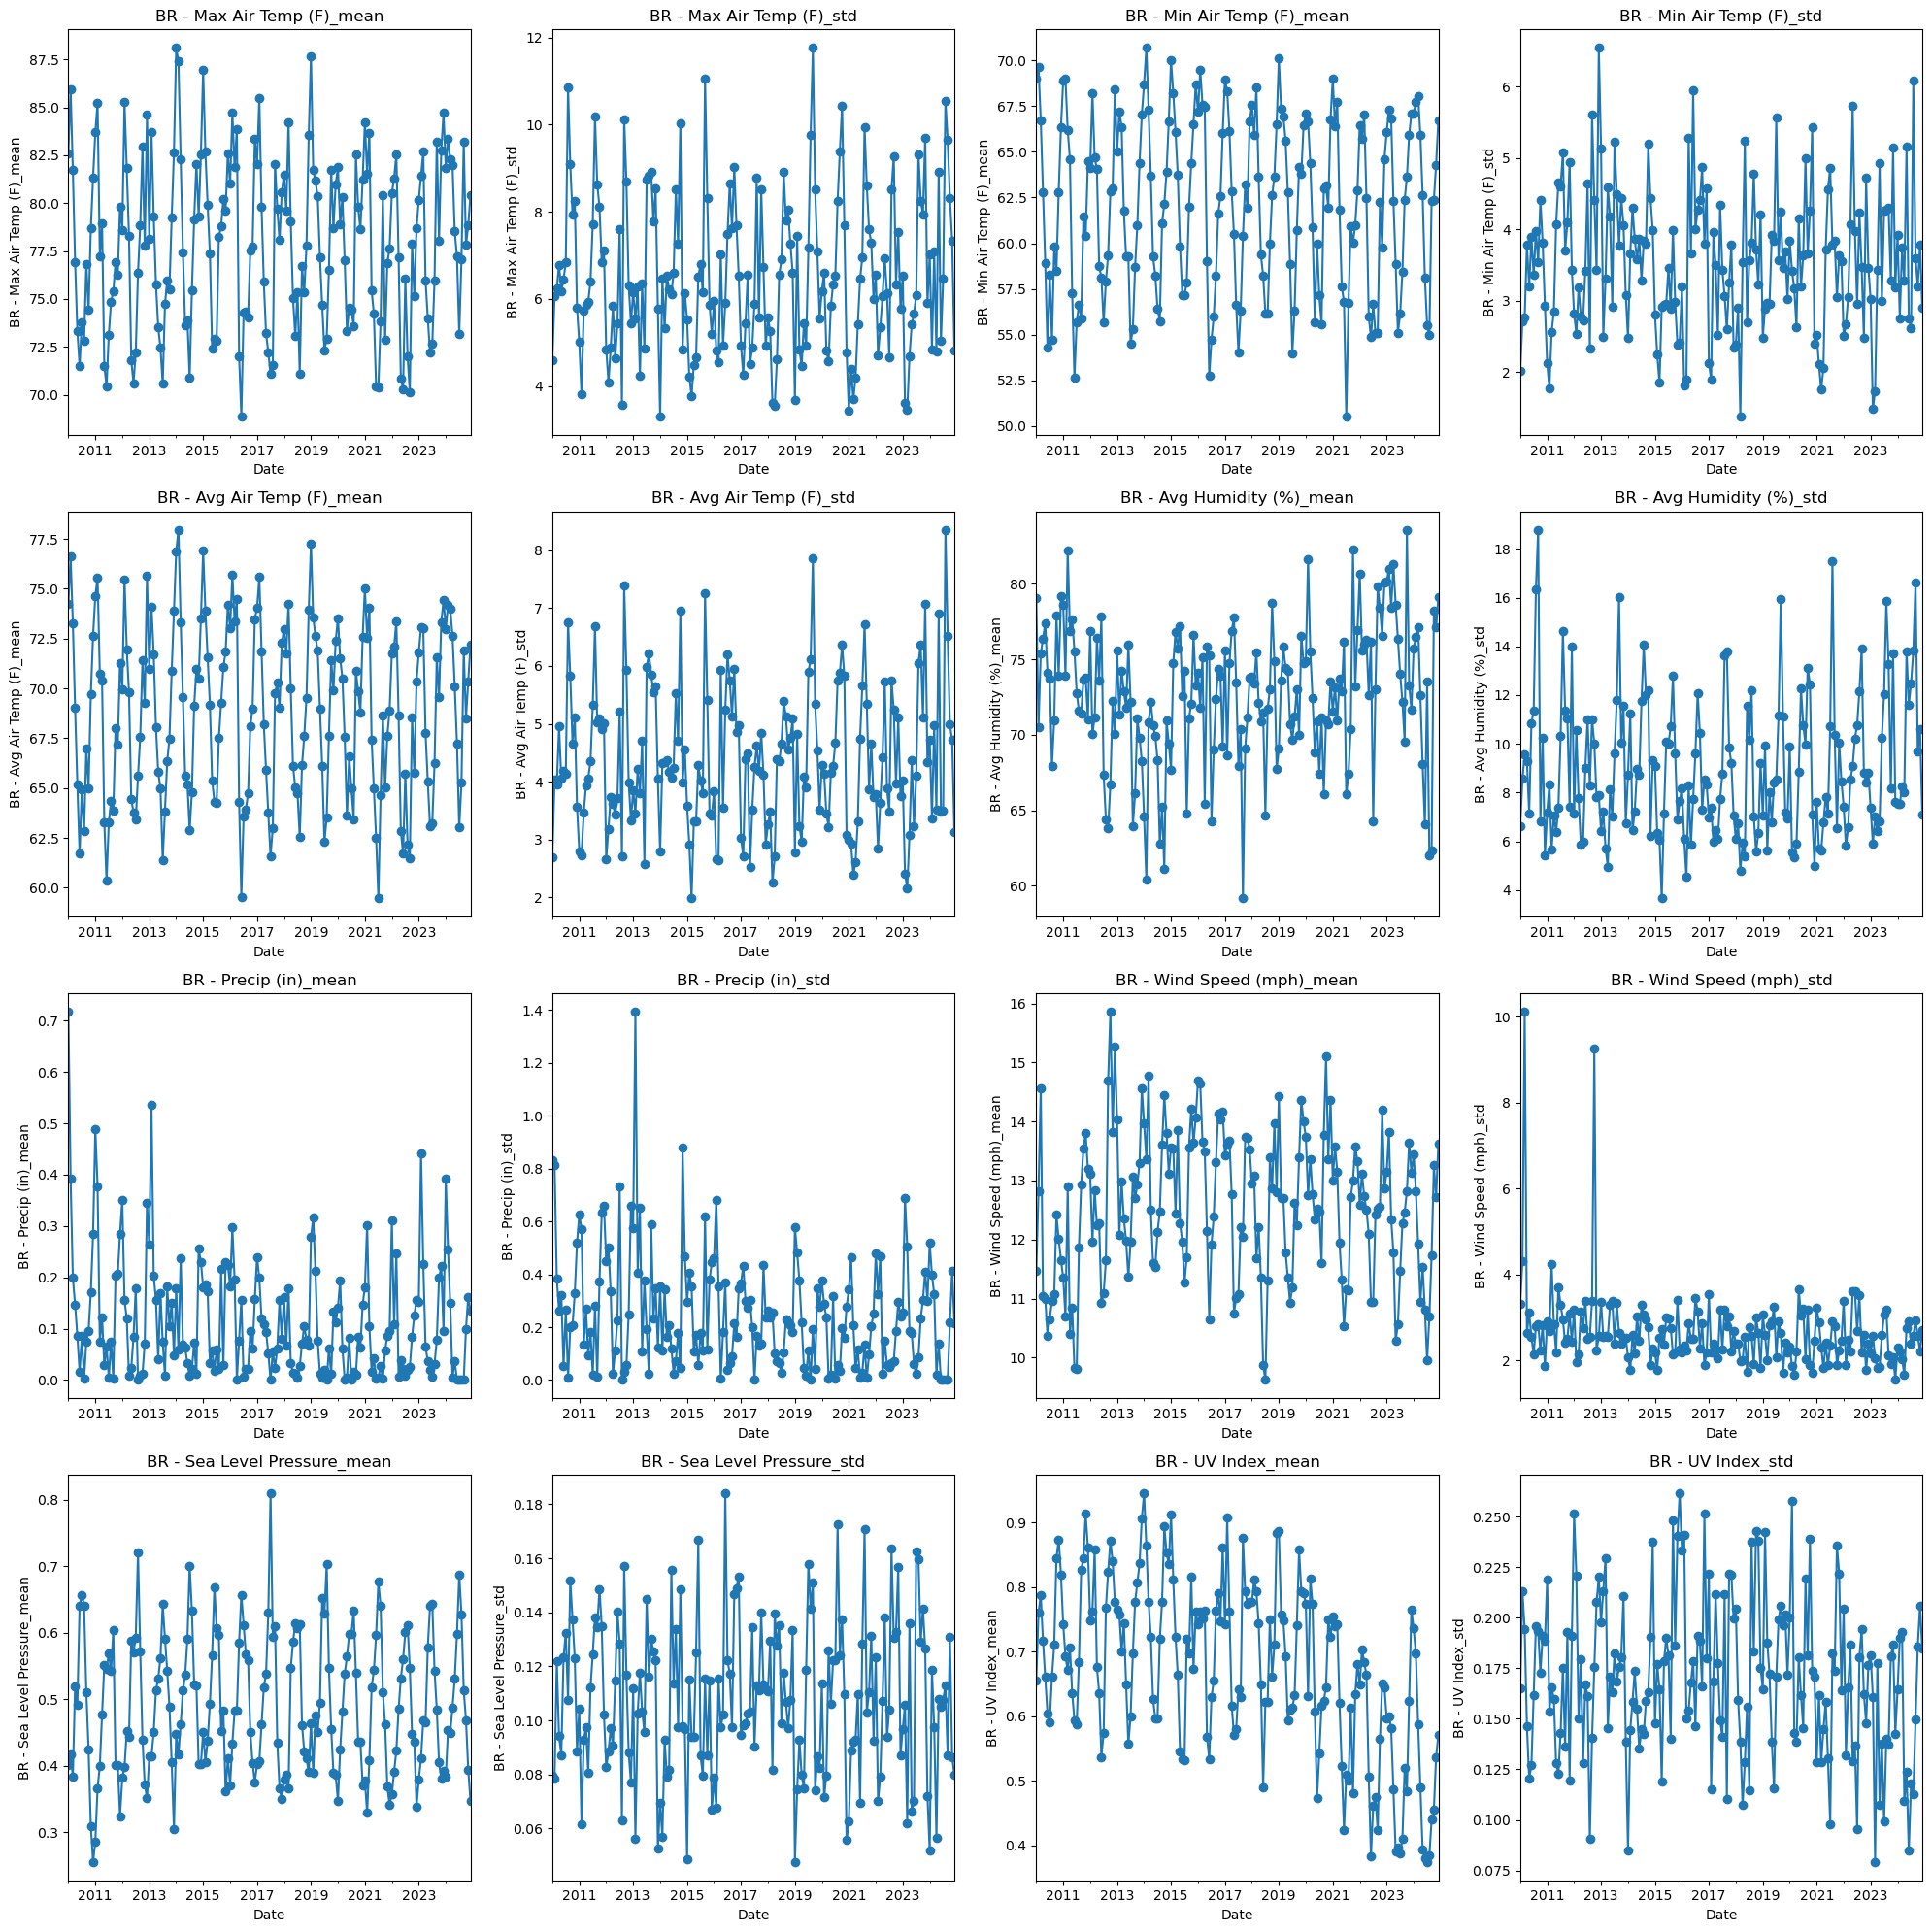

In [509]:
import matplotlib.pyplot as plt

br_stats['Date'] = pd.to_datetime(br_stats['Date'])
br_stats.set_index('Date', inplace=True)
num_cols = len(br_stats.columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Loop through each column and plot its data
for i, col in enumerate(br_stats.columns):
    br_stats[col].plot(ax=axes[i], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(col)

# If there are extra subplots, hide them
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [510]:
def rename_column(col):
    # This pattern makes the unit (and its surrounding parentheses) optional.
    pattern = r"BR - (.+?)(?: \((.+?)\))?_(mean|std)"
    match = re.match(pattern, col)
    if match:
        variable = match.group(1)
        unit = match.group(2)  # May be None if not present
        stat = match.group(3).capitalize()  # 'Mean' or 'Std'
        # Reassemble the name. Include the unit if it's present.
        return f"{variable} {stat}" + (f" ({unit})" if unit else "")
    return col

# Assuming your DataFrame is named 'br_stats'
br_stats.columns = [rename_column(col) for col in br_stats.columns]
br_stats

,Max Air Temp Mean (F),Max Air Temp Std (F),Min Air Temp Mean (F),Min Air Temp Std (F),Avg Air Temp Mean (F),Avg Air Temp Std (F),Avg Humidity Mean (%),Avg Humidity Std (%),Precip Mean (in),Precip Std (in),Wind Speed Mean (mph),Wind Speed Std (mph),Sea Level Pressure Mean,Sea Level Pressure Std,UV Index Mean,UV Index Std
Date,,,,,,,,,,,,,,,,
2010-01-31,82.619355,4.596261,69.000000,2.011301,74.254839,2.691696,79.051613,6.641630,0.717839,0.831133,11.464516,3.327917,0.401012,0.079689,0.654839,0.165002
2010-02-28,85.950000,6.058389,69.667857,2.717850,76.614286,4.040967,70.528571,8.557382,0.391786,0.813997,12.814286,4.319612,0.417087,0.078491,0.760714,0.213158
2010-03-31,81.712903,6.246479,66.745161,2.761019,73.274194,3.957774,75.383871,9.583809,0.198516,0.384259,14.561290,10.128036,0.384187,0.121794,0.787097,0.194494
2010-04-30,76.936667,6.784083,62.776667,3.783420,69.010000,4.954924,76.363333,9.298553,0.146933,0.262395,11.040000,2.651688,0.520000,0.094284,0.716667,0.146413
2010-05-31,73.335484,6.173305,58.935484,3.199640,65.177419,4.045632,77.380645,7.157114,0.086097,0.322597,11.000000,3.110520,0.491714,0.087236,0.661290,0.120215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,77.074194,10.545361,54.977419,6.090085,65.287097,8.356305,61.993548,13.815593,0.000000,0.000000,10.693548,2.563713,0.627704,0.113033,0.383871,0.112833
2024-09-30,83.180000,9.652136,62.326667,3.601239,71.920000,6.525938,62.370000,16.606545,0.000000,0.000000,11.730000,2.935884,0.513464,0.086972,0.440000,0.149943
2024-10-31,77.819355,8.308206,62.370968,3.198249,68.512903,4.985763,78.216129,9.685250,0.099839,0.217297,13.254839,2.563960,0.468944,0.130915,0.454839,0.185901


In [ ]:
foreign_df = pd.read_csv('train_data/foreign_production.csv')

# Convert volume to numeric, handling errors
foreign_df['volume'] = foreign_df['volume'].str.replace(',', '', regex=True)
foreign_df['volume'] = pd.to_numeric(foreign_df['volume'], errors='coerce')  # Convert, setting errors to NaN

# Drop rows where volume is NaN (invalid conversions)
foreign_df = foreign_df.dropna(subset=['volume'])

# Create a 'date' column from stat_year and market_month
foreign_df['date'] = pd.to_datetime(
    foreign_df['stat_year'].astype(str) + '-' + foreign_df['market_month'] + '-01', 
    format='%Y-%b-%d',
    errors='coerce'
) + pd.offsets.MonthEnd(1)

# Filter rows where commodityName ends with '(Juice)'
foreign_df = foreign_df[foreign_df['commodityName'].str.endswith('(Juice)')]

# Keep only the desired columns
foreign_df = foreign_df[['commodityName', 'volume', 'market_month', 'date']]
foreign_df.drop(columns=['market_month', 'commodityName'], inplace=True)
foreign_df.rename(columns={'date': 'Date', 'volume': 'Production'}, inplace=True)

foreign_df = foreign_df.sort_values(by='Date').reset_index(drop=True)
foreign_df['Previous Month (BR)'] = foreign_df['Production']
foreign_df['Previous Month (BR)'] = foreign_df['Previous Month (BR)'].shift(1)
foreign_df.rename(columns={'Previous Month (BR)': 'Previous Month'}, inplace=True)

foreign_df


,Production,Date,Previous Month (BR)
0,17716.0,2000-01-31,NaN
1,24176.0,2000-02-29,17716.0
2,26527.0,2000-03-31,24176.0
3,26214.0,2000-04-30,26527.0
4,17761.0,2000-05-31,26214.0
...,...,...,...
536,41380.0,2023-12-31,2751.0
537,2925.0,2024-10-31,41380.0
538,34408.0,2024-10-31,2925.0
539,3093.0,2024-11-30,34408.0


In [ ]:
br_stats['Location'] = 'BR'

br_merged = pd.merge(br_stats, foreign_df[['Date', 'Production', 'Previous Month']], on='Date', how='left')
br_merged.dropna(inplace=True)
br_merged.describe().T
br_merged.to_csv('br_data.csv', index=False)

KeyError: "['Previous Month'] not in index"

In [ ]:
finished_df = pd.concat([combined_df, br_merged], axis=0, ignore_index=True)

# Now combined_df contains rows from both merged_df and fl_merged
finished_df
finished_df.to_csv('final_data.csv', index=False)